<a href="https://colab.research.google.com/github/blancavazquez/CursoDatosMasivosII/blob/2023-I/notebooks/5a_algoritmo_Girvan_Newman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo de Girvan - Newman

El objetivo de esta libreta es revisar el algoritmo de Girvan - Newman para la identificación de comunidades.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

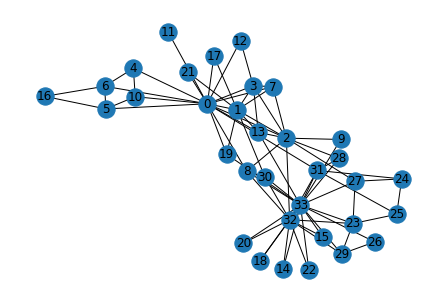

In [2]:
# load the graph
G = nx.karate_club_graph()

# visualize the graph
nx.draw(G, with_labels = True)

In [3]:
len(G.nodes), len(G.edges)

(34, 78)

In [4]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
    edge = key
    break
  
  print("edge:", edge)
  return edge

In [5]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    print("Número de comunidades detectadas:",sg_count)
    return sg

In [6]:
# find communities in the graph
c = girvan_newman(G.copy()) #devuelve el grafo

# find the nodes forming the communities
communities = []

for i in c:
  communities.append(list(i)) #i es el nodo

edge: (0, 31)
edge: (0, 31)
edge: (0, 2)
edge: (0, 2)
edge: (0, 8)
edge: (0, 8)
edge: (13, 33)
edge: (13, 33)
edge: (19, 33)
edge: (19, 33)
edge: (2, 32)
edge: (2, 32)
edge: (1, 30)
edge: (1, 30)
edge: (1, 2)
edge: (1, 2)
edge: (2, 3)
edge: (2, 3)
edge: (2, 7)
edge: (2, 7)
edge: (2, 13)
edge: (2, 13)
Número de comunidades detectadas: 2


In [7]:
#Impresión de las comunidades detectadas
communities

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

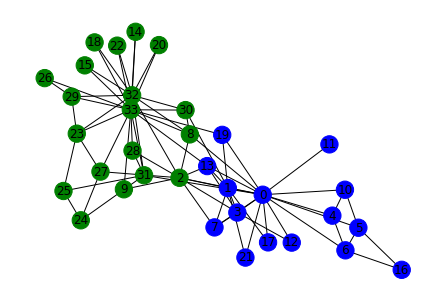

In [8]:
# plot the communities
color_map = []
for node in G:
    if node in communities[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()